<a href="https://colab.research.google.com/github/Amirhatamian/PY/blob/main/Lecture_15_groupby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#NBA Dataset Exploration

https://www.kaggle.com/nathanlauga/nba-games

In [ ]:
!ls

nba_kaggle.zip	sample_data


In [ ]:
!unzip nba_kaggle.zip

Archive:  nba_kaggle.zip
  inflating: games.csv               
  inflating: games_details.csv       
  inflating: players.csv             
  inflating: ranking.csv             
  inflating: teams.csv               


In [ ]:
games_detail_df = pd.read_csv('games_details.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
games_detail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645953 entries, 0 to 645952
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            645953 non-null  int64  
 1   TEAM_ID            645953 non-null  int64  
 2   TEAM_ABBREVIATION  645953 non-null  object 
 3   TEAM_CITY          645953 non-null  object 
 4   PLAYER_ID          645953 non-null  int64  
 5   PLAYER_NAME        645953 non-null  object 
 6   NICKNAME           30362 non-null   object 
 7   START_POSITION     247215 non-null  object 
 8   COMMENT            105602 non-null  object 
 9   MIN                540350 non-null  object 
 10  FGM                540350 non-null  float64
 11  FGA                540350 non-null  float64
 12  FG_PCT             540350 non-null  float64
 13  FG3M               540350 non-null  float64
 14  FG3A               540350 non-null  float64
 15  FG3_PCT            540350 non-null  float64
 16  FT

In [ ]:
games_detail_df.dropna()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS


In [ ]:
games_detail_df.head().T

,0,1,2,3,4
GAME_ID,22101005,22101005,22101005,22101005,22101005
TEAM_ID,1610612750,1610612750,1610612750,1610612750,1610612750
TEAM_ABBREVIATION,MIN,MIN,MIN,MIN,MIN
TEAM_CITY,Minnesota,Minnesota,Minnesota,Minnesota,Minnesota
PLAYER_ID,1630162,1630183,1626157,1627736,1626156
PLAYER_NAME,Anthony Edwards,Jaden McDaniels,Karl-Anthony Towns,Malik Beasley,D'Angelo Russell
NICKNAME,Anthony,Jaden,Karl-Anthony,Malik,D'Angelo
START_POSITION,F,F,C,G,G
COMMENT,NaN,NaN,NaN,NaN,NaN
MIN,36:22,23:54,25:17,30:52,33:46


In [ ]:
games_detail_backup_df = games_detail_df.copy()

In [ ]:
games_detail_df = games_detail_df.dropna(subset=['MIN'])

In [ ]:
games_detail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540350 entries, 0 to 645952
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            540350 non-null  int64  
 1   TEAM_ID            540350 non-null  int64  
 2   TEAM_ABBREVIATION  540350 non-null  object 
 3   TEAM_CITY          540350 non-null  object 
 4   PLAYER_ID          540350 non-null  int64  
 5   PLAYER_NAME        540350 non-null  object 
 6   NICKNAME           24808 non-null   object 
 7   START_POSITION     247215 non-null  object 
 8   COMMENT            0 non-null       object 
 9   MIN                540350 non-null  object 
 10  FGM                540350 non-null  float64
 11  FGA                540350 non-null  float64
 12  FG_PCT             540350 non-null  float64
 13  FG3M               540350 non-null  float64
 14  FG3A               540350 non-null  float64
 15  FG3_PCT            540350 non-null  float64
 16  FT

In [ ]:
games_detail_df = games_detail_df.drop(['COMMENT'], axis=1)

In [ ]:
games_detail_df['PLAYER_NAME'].value_counts().head(10)

LeBron James       1703
Andre Iguodala     1480
Kyle Korver        1458
Dwight Howard      1434
Carmelo Anthony    1417
Vince Carter       1382
Chris Paul         1363
Tony Parker        1345
Dirk Nowitzki      1330
Jamal Crawford     1310
Name: PLAYER_NAME, dtype: int64

In [ ]:
games_detail_df['PLAYER_NAME'].value_counts(ascending=True).tail(10)

Jamal Crawford     1310
Dirk Nowitzki      1330
Tony Parker        1345
Chris Paul         1363
Vince Carter       1382
Carmelo Anthony    1417
Dwight Howard      1434
Kyle Korver        1458
Andre Iguodala     1480
LeBron James       1703
Name: PLAYER_NAME, dtype: int64

- NBA dataset EDA
    - find null values in MIN (isnull)
    - backup
    - drop null subset
    - value_counts
    - sort values



#Exercise: plot a bar chart with the top 10 players that played the most matches

In [ ]:
top_10_players = games_detail_df['PLAYER_NAME'].value_counts()[0:10]

In [ ]:
top_10_players

LeBron James       1703
Andre Iguodala     1480
Kyle Korver        1458
Dwight Howard      1434
Carmelo Anthony    1417
Vince Carter       1382
Chris Paul         1363
Tony Parker        1345
Dirk Nowitzki      1330
Jamal Crawford     1310
Name: PLAYER_NAME, dtype: int64

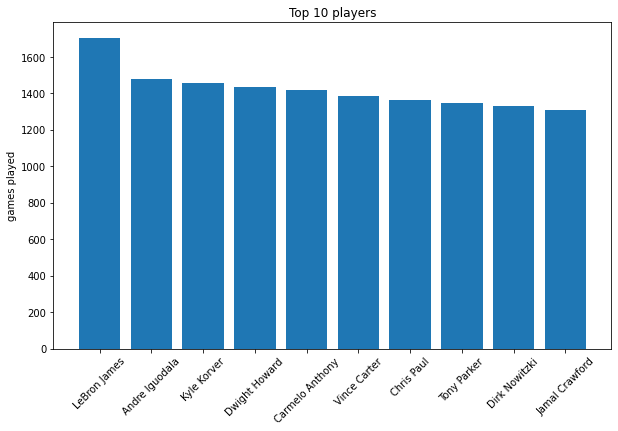

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Top 10 players')
x = top_10_players.index
y = top_10_players
plt.ylabel('games played')
plt.bar(x, y)
plt.xticks(rotation=45)
plt.show()

#Groupby

- groupby split apply
- toy example
- NBA player name

In [ ]:
toy_df = pd.DataFrame({
    'key':['A', 'B', 'C', 'C', 'B', 'B', 'A'], 'values':[1,2,3,4,2,5,3]
}, columns=['key','values'])

In [ ]:
toy_df

,key,values
0,A,1
1,B,2
2,C,3
3,C,4
4,B,2
5,B,5
6,A,3


In [ ]:
toy_groupby = toy_df.groupby('key')

In [ ]:
toy_groupby.sum()

,values
key,
A,4
B,9
C,7


In [ ]:
toy_groupby.mean()

,values
key,
A,2.0
B,3.0
C,3.5


In [ ]:
max([1,2])

2

In [ ]:
toy_groupby.aggregate(['min', np.mean, max])

values         
       min mean max
key                
A        1  2.0   3
B        2  3.0   5
C        3  3.5   4

In [ ]:
player_groupby = games_detail_df.groupby('PLAYER_NAME')

In [ ]:
player_groupby.sum().head()

,GAME_ID,TEAM_ID,PLAYER_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
PLAYER_NAME,,,,,,,,,,,,,,,,,,,,,
A.J. Guyton,10300003,1610612765,2062,0.0,4.0,0.000,0.0,2.0,0.000,4.0,...,1.0,1.0,2.0,1.0,1.0,0.0,0.0,2.0,4.0,0.0
A.J. Lawson,12100004,1610612737,1630639,2.0,3.0,0.667,2.0,2.0,1.000,2.0,...,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,8.0,-6.0
AJ Hammons,556411229,46707769518,47205417,34.0,76.0,8.924,5.0,12.0,3.833,9.0,...,14.0,46.0,60.0,7.0,1.0,16.0,14.0,34.0,82.0,2.0
AJ Price,6224869382,484794439246,60797485,655.0,1686.0,103.594,267.0,805.0,77.867,255.0,...,83.0,352.0,435.0,647.0,143.0,9.0,279.0,289.0,1832.0,-55.0
Aamir Simms,24200062,3221225504,3261206,1.0,2.0,1.000,0.0,0.0,0.000,2.0,...,3.0,2.0,5.0,2.0,0.0,0.0,0.0,2.0,4.0,6.0


#Exercise: find player that has the best PLUS_MINUS on average (mean):

In [ ]:
players_groupby_mean_df = games_detail_df.groupby('PLAYER_NAME').mean()

In [ ]:
players_groupby_mean_df.head()

,GAME_ID,TEAM_ID,PLAYER_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
PLAYER_NAME,,,,,,,,,,,,,,,,,,,,,
A.J. Guyton,1.030000e+07,1.610613e+09,2062.0,0.000000,4.000000,0.000000,0.000000,2.000000,0.000000,4.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,2.000000,4.000000,NaN
A.J. Lawson,1.210000e+07,1.610613e+09,1630639.0,2.000000,3.000000,0.667000,2.000000,2.000000,1.000000,2.000000,...,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,8.000000,-6.000000
AJ Hammons,1.918659e+07,1.610613e+09,1627773.0,1.172414,2.620690,0.307724,0.172414,0.413793,0.132172,0.310345,...,0.482759,1.586207,2.068966,0.241379,0.034483,0.551724,0.482759,1.172414,2.827586,0.068966
AJ Price,2.068063e+07,1.610613e+09,201985.0,2.176080,5.601329,0.344166,0.887043,2.674419,0.258694,0.847176,...,0.275748,1.169435,1.445183,2.149502,0.475083,0.029900,0.926910,0.960133,6.086379,-0.200000
Aamir Simms,1.210003e+07,1.610613e+09,1630603.0,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,...,1.500000,1.000000,2.500000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000


In [ ]:
players_groupby_mean_df['PLUS_MINUS'].max()

15.0

In [ ]:
best_plus_min_guy = players_groupby_mean_df['PLUS_MINUS'] == players_groupby_mean_df['PLUS_MINUS'].max()

In [ ]:
sum(best_plus_min_guy)

1

In [ ]:
players_groupby_mean_df[best_plus_min_guy]

,GAME_ID,TEAM_ID,PLAYER_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
PLAYER_NAME,,,,,,,,,,,,,,,,,,,,,
Renaldo Major,20600578.0,1.610613e+09,200970.0,2.0,10.0,0.2,0.0,0.0,0.0,1.0,...,0.0,2.0,2.0,0.0,2.0,0.0,1.0,4.0,5.0,15.0


#Exercise: find player that has the most AST (assists)

#Exercise: who is the most accurate shooter inside the 3 that has tried at least 1000 shots

- use these
    - FGM = Field goal made    
    - FGA = Field goal attempted
- create and use this
    - Accuracy = FGM / FGA